# Digital Xchange 25.05.2019 - Deep Learning **mit** Keras und TensorFlow

## Problemstellung - Handgeschriebene Zahlen erkennen

Die Aufgabe, handgeschriebene Zahlen anhand eines Graustufenbilds zu erkennen, ist ein sehr komplexes Problem für einen Computer. Für ein solches Problem wird Deep Learning aka ein Neuronales Netz benötigt.

## Setup in Google Colab

Die Berechnungen dieses Dokuments sind sehr rechenaufwändig. Daher bietet es sich an eine Funktion von Google Colab zu nutzen. Eine GPU kann über

*   Edit -> Notebook Preferences -> Hardware acceleration -> GPU

ausgewählt werden.

In [0]:
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']


## Das MNIST Data Set

Das MNIST Data Set besteht aus handgeschriebenen Zahlen 0 bis 9. Die folgende Zelle zeigt einige zufällige Einträge des Datensatzes.

11493376/11490434 [==============================] - 0s 0us/step


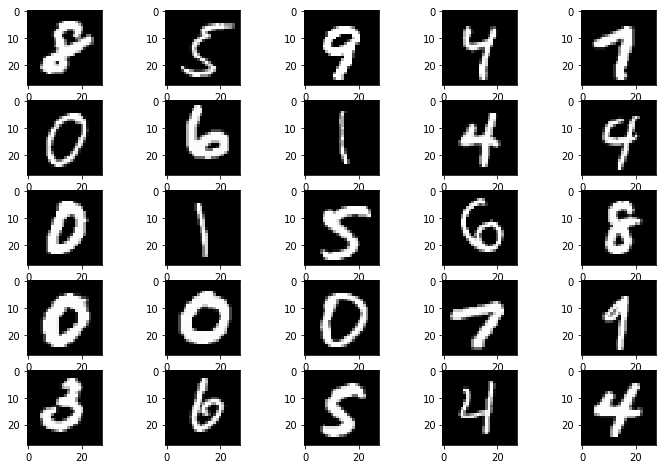

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.rcParams['figure.figsize'] = (12, 8)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard

(x_train, y_train), (x_test, y_test) = mnist.load_data()

offset = random.randint(1,59000)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i + offset], cmap='gray', interpolation='none')

## Normalisieren und Formattieren der Daten

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Trainieren des Neuronales Netzes mit Keras

In [0]:
# Die Lernrate beeinflusst wie stark die Werte bei einem Parameterupdate
# verändert werden. Große Lernraten lassen den Fehler stark schwanken und
# kleine Lernraten sorgen für ein zu langsames Lernen.
learning_rate = 0.001

# Die batch_size ist die Anzahl der Trainingsbeispiele die sich das Netzwerk
# anguckt, bevor ein Parameterupdate durchgeführt wird.
batch_size = 128

# Die Anzahl der Epochen bestimmt wie oft die gesamten Daten gelernt werden
# sollen. Bei zu wenig Epochen hat das Netz nicht genug lernen können. Bei
# zu vielen Epochen wird das Netzwerk stagnieren und im schlimmsten Fall
# die Trainingsdaten auswendig lernen.
epochs = 10

In [0]:
model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(lr=learning_rate),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [0]:
tensorboard_callback = TensorBoard(log_dir='./log', histogram_freq=0,
                         write_graph=True,
                         write_grads=False,
                         batch_size=batch_size,
                         write_images=True)

history = model.fit(x=x_train, y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=[tensorboard_callback])

Epoch 1/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0077 - acc: 0.9976
Epoch 2/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0078 - acc: 0.9975
Epoch 3/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0075 - acc: 0.9977
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0072 - acc: 0.9975
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0075 - acc: 0.9975
Epoch 6/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0063 - acc: 0.9980
Epoch 7/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0070 - acc: 0.9977
Epoch 8/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0053 - acc: 0.9984
Epoch 9/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0069 - acc: 0.9978
Epoch 10/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0065 - a

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

print("Click the link above this message!")

--2019-05-10 08:14:59--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.236.200.27, 54.173.32.212, 52.204.136.9, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.236.200.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16529980 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  15.76M  80.2MB/s    in 0.2s    

2019-05-10 08:14:59 (80.2 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [16529980/16529980]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://f10726df.ngrok.io
Click the link above this message!


No handles with labels found to put in legend.


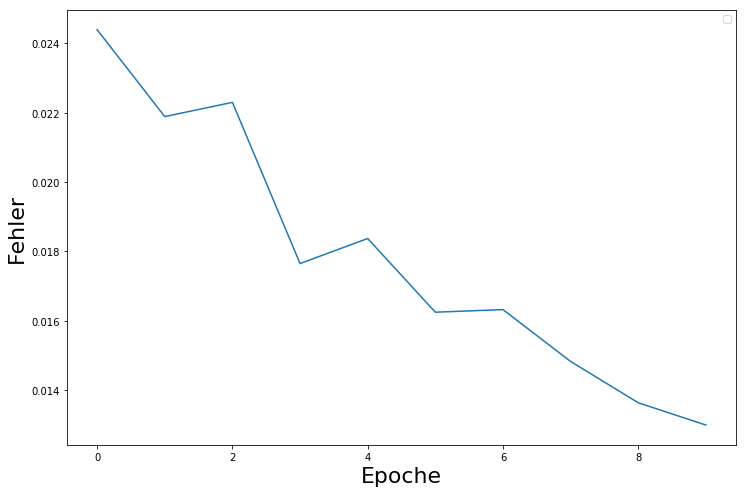

In [0]:
plt.xlabel('Epoche', fontsize=22)
plt.ylabel('Fehler', fontsize=22)
plt.legend(loc="upper right")
plt.plot(history.history['loss'], label="Fehler")

## Güte des Neuronalem Netzes

In [0]:
accuracy = model.evaluate(x_train, y_train, verbose=0)[1]
print("Training accuracy: " + str(accuracy * 100) + "%")

accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print("Testing accuracy: " + str(accuracy * 100) + "%")

Training accuracy: 99.92833333333333%
Testing accuracy: 99.2%


## Klassifizierung eines zufälligen Zeichens

Target class: 8
Predicted class: 8
The network correctly predicted the class!


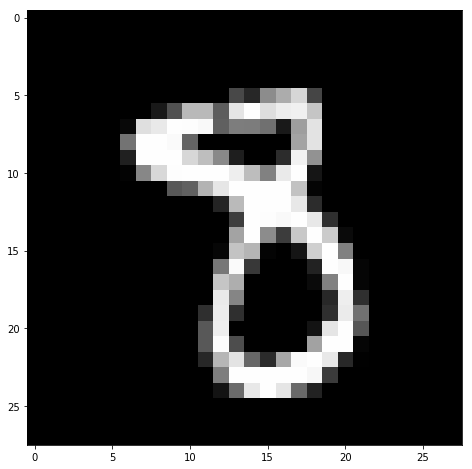

In [0]:
import random

random_index = random.randint(0, len(x_test))
random_image = x_test[random_index]
random_target = y_test[random_index] 
random_prediction = model.predict(x=random_image.reshape(-1, random_image.shape[0],random_image.shape[1],random_image.shape[2]))

target_class = np.argmax(random_target)
predicted_class = np.argmax(random_prediction)

print("Target class: " + str(target_class))
print("Predicted class: " + str(predicted_class))
if target_class == predicted_class:
  print("The network correctly predicted the class!")
else:
  print("The network couldn't predict the class!")

plt.imshow(random_image.reshape(random_image.shape[0],random_image.shape[1]), cmap='gray', interpolation='none')